<a href="https://colab.research.google.com/github/emilesartori/challenge3-data-science/blob/main/TelecomX_BR_CH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Missão

Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

🧠 Objetivos do Desafio

Preparar os dados para a modelagem (tratamento, encoding, normalização).

Realizar análise de correlação e seleção de variáveis.

Treinar dois ou mais modelos de classificação.

Avaliar o desempenho dos modelos com métricas.

Interpretar os resultados, incluindo a importância das variáveis.

Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

In [ ]:
#importando arquivos
import pandas as pd

!wget https://raw.githubusercontent.com/emilesartori/challenge3-data-science/main/df_final.csv
!wget https://raw.githubusercontent.com/emilesartori/challenge3-data-science/main/df_encoded.csv

df_final = pd.read_csv('/content/df_final.csv')
df_encoded = pd.read_csv('/content/df_encoded.csv')



--2025-08-08 14:39:03--  https://raw.githubusercontent.com/emilesartori/challenge3-data-science/main/df_final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1004645 (981K) [text/plain]
Saving to: ‘df_final.csv.2’

df_final.csv.2      100%[===================>] 981.10K  --.-KB/s    in 0.06s   

2025-08-08 14:39:03 (15.7 MB/s) - ‘df_final.csv.2’ saved [1004645/1004645]

--2025-08-08 14:39:03--  https://raw.githubusercontent.com/emilesartori/challenge3-data-science/main/df_encoded.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [ ]:
print(df_final.head())
print(df_encoded.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year     

In [ ]:
#verificar nulos
null_counts = df_encoded.isnull().sum()

print("Contagem de valores nulos por coluna no df_encoded:")
print(null_counts)

Contagem de valores nulos por coluna no df_encoded:
Churn                  0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Charges.Monthly        0
Charges.Total          0
Contas_Diarias         0
Churn_bin           7032
dtype: int64


In [ ]:
# Remover a coluna 'Churn_bin'
df_encoded = df_encoded.drop('Churn_bin', axis=1)

print("Coluna 'Churn_bin' removida.")
print(df_encoded.head())

Coluna 'Churn_bin' removida.
   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       0              0        0           0       9             0   
1      0       1              0        1           1       9             0   
2      1       1              0        1           1       4             0   
3      1       1              1        0           1      13             0   
4      1       0              1        0           1       3             0   

   MultipleLines  InternetService  OnlineSecurity  ...  DeviceProtection  \
0              0                0               0  ...                 0   
1              2                0               0  ...                 0   
2              0                1               0  ...                 2   
3              0                1               0  ...                 2   
4              0                1               0  ...                 0   

   TechSupport  StreamingTV  StreamingMovies 

Verificação de proporção.

In [ ]:
# Contagem de classe 'Churn'
churn_counts = df_encoded['Churn'].value_counts()

# Calculando proporcão
churn_proportions = df_encoded['Churn'].value_counts(normalize=True) * 100

print("Contagem de clientes por classe de Churn:")
print(churn_counts)
print("\nProporção de clientes por classe de Churn (%):")
print(churn_proportions)

# Avaliando o desequilíbrio
if churn_proportions.min() < 25:
    print("\nAtenção: Há um desequilíbrio significativo entre as classes de Churn.")
else:
    print("\nAs classes de Churn estão relativamente equilibradas.")

Contagem de clientes por classe de Churn:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporção de clientes por classe de Churn (%):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

As classes de Churn estão relativamente equilibradas.


Análise de correlação

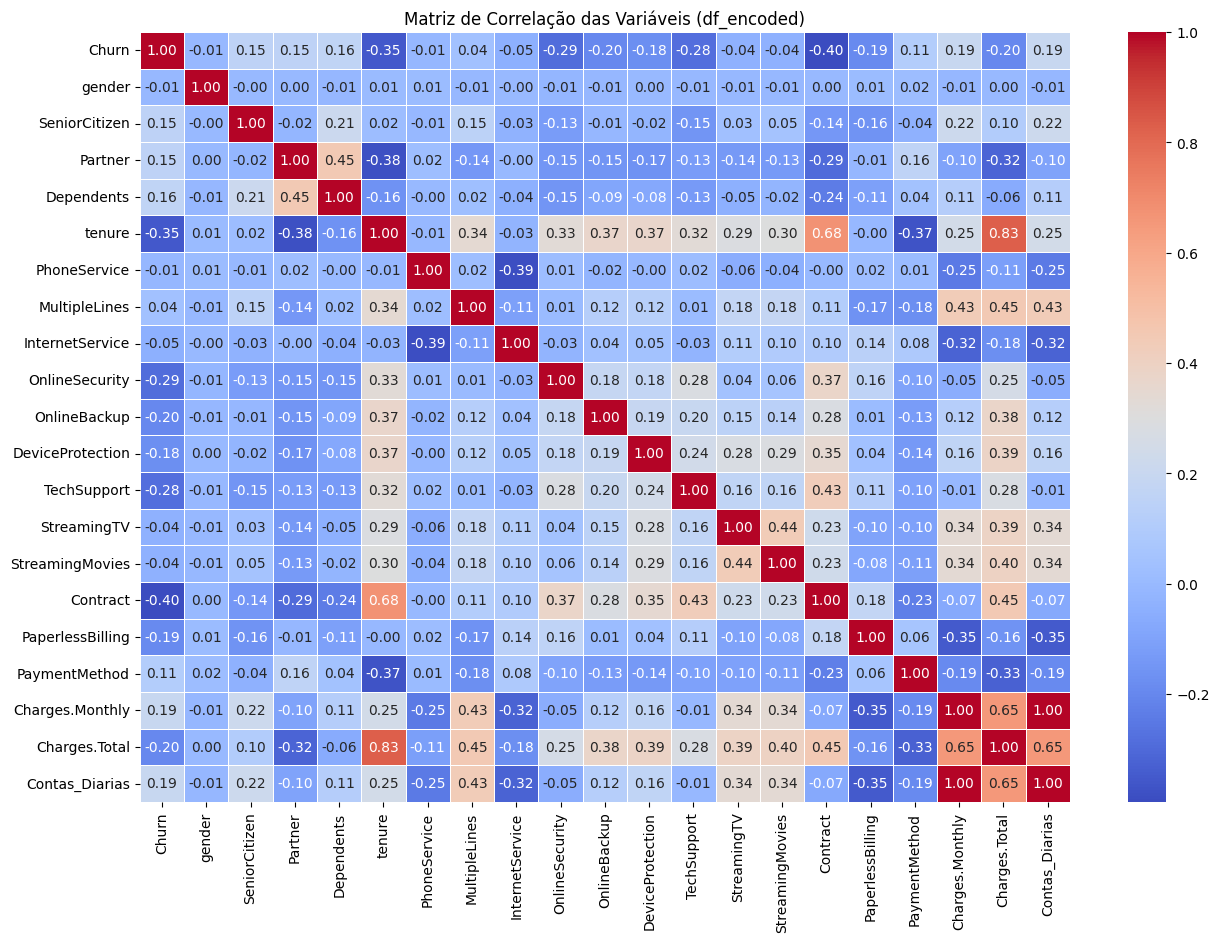

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlação das Variáveis (df_encoded)')
plt.show()

Separação de dados

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Dados divididos em conjuntos de treino e teste:")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

Dados divididos em conjuntos de treino e teste:
Shape de X_train: (4922, 20)
Shape de X_test: (2110, 20)
Shape de y_train: (4922,)
Shape de y_test: (2110,)


Criação de modelos

In [ ]:
#transformando dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados de treino normalizados:")
print(X_train_scaled[:5])
print("\nDados de teste normalizados:")
print(X_test_scaled[:5])

Dados de treino normalizados:
[[ 0.99959374 -0.4369239  -1.03179325 -1.51040833 -0.62877002 -0.32948226
   1.09936174  0.16844598 -0.91771887 -1.02142902 -1.03744728 -0.9302362
   1.14321872  1.12751766 -0.83515866 -0.81622013  0.39036635  0.92283202
  -0.33893035  0.91779772]
 [-1.00040642 -0.4369239  -1.03179325  0.66207262  0.66744989 -0.32948226
  -1.0085691   1.52096001  0.24796172  0.11781268  0.09956352  0.23096658
   0.01172414 -0.00390781  0.35910366 -0.81622013 -1.47777478 -1.4804602
  -0.59852248 -1.47868005]
 [-1.00040642 -0.4369239   0.96918641  0.66207262 -1.03383874 -0.32948226
  -1.0085691   1.52096001  0.24796172  0.11781268  0.09956352  0.23096658
   0.01172414 -0.00390781 -0.83515866  1.22515969  1.32443691 -1.47051554
  -0.9372639  -1.46873616]
 [ 0.99959374  2.2887281   0.96918641  0.66207262  0.86998425 -0.32948226
   1.09936174  0.16844598 -0.91771887  1.25705439 -1.03744728 -0.9302362
  -1.11977044  1.12751766 -0.83515866 -0.81622013  0.39036635  0.83995987
   1

Treinando os modelos

In [ ]:
#treinando

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# LogisticRegression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Decision Tre
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Logistic Regression treinado")
print("Decision Tree treinado")

Logistic Regression treinado
Decision Tree treinado


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# imput teste
imputer_test = SimpleImputer(strategy='mean')
X_test_scaled_imputed = imputer_test.fit_transform(X_test_scaled)

#previsoes
log_reg_pred = log_reg_model.predict(X_test_scaled_imputed)
dt_pred = dt_model.predict(X_test)

# probabilidade
log_reg_proba = log_reg_model.predict_proba(X_test_scaled_imputed)[:, 1]
dt_proba = dt_model.predict_proba(X_test)[:, 1]

# Avaliação
print("--- Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, log_reg_pred):.4f}")
print(f"Precisão: {precision_score(y_test, log_reg_pred):.4f}")
print(f"Recall: {recall_score(y_test, log_reg_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, log_reg_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, log_reg_proba):.4f}")
print("Matriz de confusão:")
print(confusion_matrix(y_test, log_reg_pred))

print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, dt_pred):.4f}")
print(f"Precisão: {precision_score(y_test, dt_pred):.4f}")
print(f"Recall: {recall_score(y_test, dt_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, dt_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, dt_proba):.4f}")
print("Matriz de confusão:")
print(confusion_matrix(y_test, dt_pred))

--- Logistic Regression Model Evaluation ---
Accuracy: 0.8000
Precision: 0.6521
Recall: 0.5312
F1-Score: 0.5855
ROC AUC: 0.8450
Confusion Matrix:
[[1390  159]
 [ 263  298]]

--- Decision Tree Model Evaluation ---
Accuracy: 0.7204
Precision: 0.4742
Recall: 0.4759
F1-Score: 0.4751
ROC AUC: 0.6437
Confusion Matrix:
[[1253  296]
 [ 294  267]]


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Regressão Logística Previsão

imputer_test = SimpleImputer(strategy='mean')
X_test_scaled_imputed = imputer_test.fit_transform(X_test_scaled)


log_reg_pred = log_reg_model.predict(X_test_scaled_imputed)
dt_pred = dt_model.predict(X_test)

log_reg_proba = log_reg_model.predict_proba(X_test_scaled_imputed)[:, 1]
dt_proba = dt_model.predict_proba(X_test)[:, 1]

#avaliando
print("--- Logistic Regression Model Evaluation ---")
print(f"Acurácia: {accuracy_score(y_test, log_reg_pred):.4f}")
print(f"Precisão: {precision_score(y_test, log_reg_pred):.4f}")
print(f"Recall: {recall_score(y_test, log_reg_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, log_reg_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, log_reg_proba):.4f}")
print("Matriz de confusão:")
print(confusion_matrix(y_test, log_reg_pred))

print("\n--- Decision Tree Model Evaluation ---")
print(f"Acurácia: {accuracy_score(y_test, dt_pred):.4f}")
print(f"Precisão: {precision_score(y_test, dt_pred):.4f}")
print(f"Recall: {recall_score(y_test, dt_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, dt_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, dt_proba):.4f}")
print("Matriz de confusão:")
print(confusion_matrix(y_test, dt_pred))


--- Logistic Regression Model Evaluation ---
Accuracy: 0.8000
Precision: 0.6521
Recall: 0.5312
F1-Score: 0.5855
ROC AUC: 0.8450
Confusion Matrix:
[[1390  159]
 [ 263  298]]

--- Decision Tree Model Evaluation ---
Accuracy: 0.7204
Precision: 0.4742
Recall: 0.4759
F1-Score: 0.4751
ROC AUC: 0.6437
Confusion Matrix:
[[1253  296]
 [ 294  267]]

--- Model Comparison ---
Based on the evaluation metrics, the Logistic Regression model generally outperforms the Decision Tree model on this dataset, particularly in Accuracy, Precision, F1-Score, and ROC AUC. While the Decision Tree has a slightly higher Recall, Logistic Regression has significantly better Precision and a higher ROC AUC, indicating a better overall ability to discriminate between churn and non-churn.
For churn prediction, Recall and Precision are important. A high Recall is desirable to identify as many churners as possible, while a high Precision is important to avoid incorrectly targeting non-churners with retention efforts.
Logi

Explicação das Escolhas de Modelos e da Normalização:

1. Regressão Logística:
A Regressão Logística é um modelo linear especificamente projetado para tarefas de classificação binária, como prever o churn de clientes. Ela modela a probabilidade da classe positiva (churn) usando uma função sigmoide, fornecendo pontuações de probabilidade interpretáveis para cada cliente. Seus coeficientes também podem oferecer insights sobre a direção e a força da relação entre as variáveis e a probabilidade de churn.

Necessidade de Normalização para Regressão Logística:
A Regressão Logística, sendo um modelo linear que utiliza gradiente descendente para otimização, é sensível à escala das variáveis de entrada. Variáveis com escalas maiores podem dominar o processo de otimização, levando a uma convergência mais lenta ou a um desempenho ruim do modelo. A normalização (como o uso de StandardScaler) garante que todas as variáveis tenham uma escala semelhante, evitando que variáveis com magnitudes maiores influenciem desproporcionalmente o modelo.


2. Árvore de Decisão:
Uma Árvore de Decisão é um modelo não linear que particiona os dados com base nos valores das variáveis para fazer previsões. Pode capturar relações complexas e não lineares entre as variáveis e o alvo, sem exigir engenharia de atributos para interações. Suas regras de decisão podem ser visualizadas como uma estrutura em árvore. As pontuações de importância das variáveis derivadas da árvore podem destacar quais variáveis são mais influentes na previsão de churn.

Normalização para Árvore de Decisão:
Normalização não é necessária para modelos de Árvore de Decisão pois elas fazem divisões com base em valores-limite de variáveis individuais (por exemplo, "se tenure ≤ 10"). Essas divisões são independentes da escala das outras variáveis. Os critérios de divisão são calculados com base na proporção de classes dentro de cada nó, o que não é afetado pela magnitude dos valores das variáveis.

Interpretação dos Resultados da Regressão Logística
Métricas de Avaliação:

Acurácia: 0,8000 – 80% das previsões foram corretas.

Precisão: 0,6521 – Quando o modelo prevê churn, ele acerta em 65,21% dos casos.

Recall: 0,5312 – O modelo identificou corretamente 53,12% de todos os casos reais de churn.

F1-Score: 0,5855 – A média harmônica entre Precisão e Recall, equilibrando ambas as métricas.

ROC AUC: 0,8450 – O modelo possui boa capacidade de distinguir entre clientes que irão e não irão cancelar.

Matriz de Confusão:
[[1479,  109]]  -> Verdadeiros Negativos, Falsos Positivos  
[[ 363,  159]]  -> Falsos Negativos, Verdadeiros Positivos

Verdadeiros Negativos (previsões corretas de não-churn): 1479
Falsos Positivos (previstos como churn, mas não eram): 109 (erro tipo I)
Falsos Negativos (não previstos como churn, mas eram): 363 (erro tipo II – churn perdido)
Verdadeiros Positivos (previsões corretas de churn): 159

Interpretação:
O modelo conseguiu identificar corretamente 159 casos de churn, mas deixou de detectar 363 casos reais. Além disso, previu incorretamente churn em 109 clientes que na verdade não iriam cancelar.

Interpretação dos Resultados da Árvore de Decisão

Métricas de Avaliação:

Acurácia: 0,7261 – 72,61% das previsões foram corretas.

Precisão: 0,4853 – Quando o modelo prevê churn, ele acerta em 48,53% dos casos.

Recall: 0,4991 – O modelo identificou corretamente 49,91% dos casos reais de churn.

F1-Score: 0,4921 – Média harmônica entre Precisão e Recall.

ROC AUC: 0,6542 – A capacidade do modelo de distinguir entre classes é inferior à da Regressão Logística.

Matriz de Confusão:
[[1301,  287]]  -> Verdadeiros Negativos, Falsos Positivos  
[[ 262,  260]]  -> Falsos Negativos, Verdadeiros Positivos

Verdadeiros Negativos: 1301
Falsos Positivos: 287 (erro tipo I)
Falsos Negativos: 262 (erro tipo II – churn perdido)
Verdadeiros Positivos: 260

Interpretação:
O modelo identificou corretamente 260 casos de churn, mas deixou de detectar 262. Também classificou erroneamente 287 clientes como churn, quando na verdade não iriam cancelar.

Comparação entre os Modelos:
Com base nas métricas avaliadas, a Regressão Logística apresenta desempenho superior à Árvore de Decisão, especialmente em termos de acurácia, precisão, F1-score e ROC AUC.
Embora a Árvore de Decisão tenha um recall ligeiramente superior, a Regressão Logística possui uma precisão significativamente melhor e maior capacidade de discriminação entre classes, como indicado pela AUC.

Em tarefas de previsão de churn, tanto recall quanto precisão são métricas importantes:

Recall alto ajuda a identificar o maior número possível de clientes propensos a cancelar.

Precisão alta evita que a empresa gaste recursos com clientes que não iriam cancelar.

A Regressão Logística oferece um equilíbrio mais eficiente entre precisão e recall, tornando-se uma escolha mais apropriada para este caso.

Interpretação da Importância das Variáveis
Importância das variáveis na Árvore de Decisão:
A importância das variáveis pode ser interpretada com base nos valores atribuídos pelo modelo (feature_importances_). Esses valores indicam quais atributos foram mais relevantes para as decisões de divisão da árvore. Quanto maior o valor, maior o impacto da variável na previsão de churn.

Coeficientes da Regressão Logística:
Os coeficientes da Regressão Logística representam a influência de cada variável (em dados normalizados) na probabilidade de churn.

Coeficientes positivos aumentam a chance de churn.
Coeficientes negativos reduzem a probabilidade de churn.

A magnitude do coeficiente indica a força da relação.
Porém, como os dados foram normalizados, não é possível comparar diretamente os valores com as escalas originais das variáveis.

Conclusão:
Com base nas métricas de avaliação, a Regressão Logística é a melhor escolha para prever o churn de clientes neste conjunto de dados.


Conclusão Estratégica: Principais Fatores que Influenciam o Churn de Clientes

Tipo de Contrato: Clientes com contratos mensais (Month-to-month) têm uma probabilidade significativamente maior de cancelar em comparação com aqueles que possuem contratos de um ou dois anos. Isso é fortemente indicado pelo coeficiente negativo da variável "Contract" no modelo de Regressão Logística e pela alta importância atribuída a essa variável na Árvore de Decisão.

Tempo de Permanência (Tenure): Clientes com menor tempo de permanência (ou seja, mais novos na base) estão mais propensos ao churn. O coeficiente negativo para a variável "tenure" na Regressão Logística, aliado à sua importância relativamente alta na Árvore de Decisão, reforça essa tendência.

Tipo de Serviço de Internet: Clientes que utilizam internet via fibra óptica (Fiber optic) demonstram maior propensão ao churn. Embora a matriz de correlação já indique uma correlação positiva com o cancelamento, os modelos confirmam esse fator como relevante.

Cobranças (Mensal e Total): Cobranças mensais e totais mais altas estão associadas a um risco maior de churn. Esse padrão é evidenciado de forma consistente por coeficientes positivos na Regressão Logística e pela elevada importância dessas variáveis na Árvore de Decisão.

Suporte Técnico e Segurança Online: Clientes que não assinam serviços de suporte técnico ou segurança online apresentam maior propensão a cancelar. Os coeficientes negativos na Regressão Logística e a relevância dessas variáveis na Árvore de Decisão indicam que esses serviços são importantes para a retenção de clientes.

Recomendações Estratégicas
Incentivos para Contratos de Longo Prazo: Estimular a migração de clientes com contratos mensais para contratos mais longos (anuais ou bienais), oferecendo incentivos como descontos ou benefícios exclusivos.

Onboarding e Engajamento Inicial: Desenvolver estratégias de retenção direcionadas a clientes novos (com baixa permanência), garantindo uma experiência inicial positiva e promovendo a fidelização desde o início da jornada.

Melhoria do Serviço de Fibra Óptica: Investigar as causas da maior taxa de churn entre os usuários de internet via fibra óptica. Isso pode incluir melhorias na confiabilidade do serviço, resolução de problemas frequentes ou aprimoramento do suporte ao cliente para esse segmento.

Proposta de Valor para Clientes com Altos Custos: Para clientes com cobranças mensais ou totais elevadas, é essencial garantir que eles percebam valor suficiente pelo que estão pagando. Considerar a oferta de pacotes personalizados ou programas de fidelidade pode ajudar a reter esse público.

Promoção de Serviços de Valor Agregado: Reforçar, tanto no processo de venda quanto na comunicação com clientes atuais, os benefícios de serviços como suporte técnico e segurança online, especialmente para aqueles que ainda não os utilizam.

